In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [39]:
df = pd.read_csv('airline cost new.csv')
df.head()

,num_pass,cost
0,61,4280
1,63,4080
2,67,4420
3,69,4170
4,70,4480


In [40]:
# Model we need to build.
# Cost = c + m*Num_pass

# Questions:
# if we build this model what are the uses for the company from this model.

# To get the base cost.
# m - variable cost.(fixed)
# company will never fix the cost lesser than variable cost.
# So the cost should be higher than m.

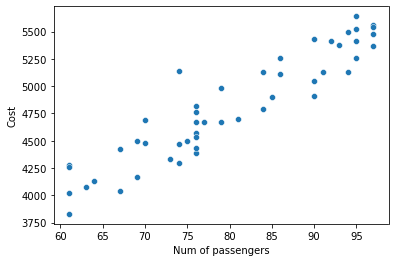

In [41]:
sns.scatterplot(df['num_pass'],df['cost'])
plt.xlabel('Num of passengers')
plt.ylabel('Cost')
plt.show()

In [42]:
## Cost = c + m*num_pass

x = df['num_pass'].values
y = df['cost'].values
n = len(y)

y_mean = np.mean(y)
x_mean = np.mean(x)

### OLS From scratch.(using python)

In [43]:
numerator = 0
denominator = 0

for i in range(n):
    numerator+=((x[i]-x_mean)*(y[i]-y_mean))
    denominator+=((x[i]-x_mean)**2)

m = numerator / denominator
c = y_mean - m*x_mean

print('m: ',m, 'C:', c)

m:  39.89413456928241 C: 1612.9763145277288


### OLS using Statsmodels (Statistics Algorithms)

In [44]:
import statsmodels.api as sm

In [45]:
x = df['num_pass']
y = df['cost']

In [46]:
Xc = sm.add_constant(x)
Xc

,const,num_pass
0,1.0,61
1,1.0,63
2,1.0,67
3,1.0,69
4,1.0,70
5,1.0,74
6,1.0,76
7,1.0,81
8,1.0,86
9,1.0,91


In [47]:
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     302.2
Date:                Thu, 27 May 2021   Prob (F-statistic):           4.23e-22
Time:                        21:55:12   Log-Likelihood:                -323.87
No. Observations:                  49   AIC:                             651.7
Df Residuals:                      47   BIC:                             655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1612.9763    185.831      8.680      0.000    1239.133    1986.820
num_pass      39.8941      2.295     17.383      0.000      35.277      44.511
==============================================================================
Omnibus:                        3.612   Durbin-Watson:                   2.624
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.700
Skew:                           0.556   Prob(JB):                        0.259
Kurtosis:                       3.296   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
## This is predicted value.

y_pred = model.predict(Xc)
y_pred

0     4046.518523
1     4126.306792
2     4285.883331
3     4365.671600
4     4405.565734
5     4565.142273
6     4644.930542
7     4844.401215
8     5043.871887
9     5243.342560
10    5402.919099
11    5482.707368
12    5363.024964
13    5482.707368
14    4684.824676
15    4405.565734
16    4964.083618
17    5482.707368
18    4285.883331
19    5402.919099
20    5323.130829
21    4764.612946
22    5402.919099
23    4644.930542
24    4365.671600
25    4046.518523
26    4644.930542
27    4644.930542
28    4046.518523
29    4644.930542
30    4166.200927
31    4565.142273
32    4525.248138
33    4964.083618
34    4644.930542
35    5043.871887
36    5203.448426
37    4605.036407
38    4046.518523
39    4644.930542
40    5402.919099
41    5003.977753
42    5482.707368
43    4764.612946
44    4565.142273
45    5203.448426
46    5283.236695
47    5363.024964
48    5203.448426
dtype: float64

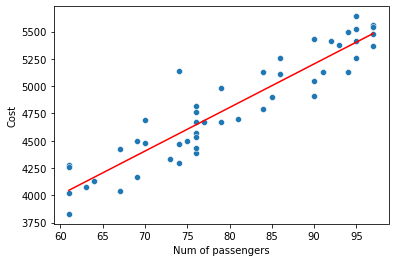

In [49]:
sns.scatterplot(df['num_pass'],df['cost'])
sns.lineplot(df['num_pass'],y_pred,color='red')
plt.xlabel('Num of passengers')
plt.ylabel('Cost')
plt.show()

# DAY 02

In [50]:
## Business to business case.

df = pd.read_csv('virginia semiconductors.csv')
df.head()

,Size_of_Purchase,Company_Size,%Imports,Distance,Central_Purchaser
0,27.9,25.6,41,18,0
1,89.6,109.8,16,75,0
2,12.8,39.4,29,14,0
3,34.9,16.7,31,117,0
4,408.6,278.4,14,209,1


In [51]:
# Null and Alternative Hypothesis.
# H0 = 0, not significant.
# H1 !=0, significant.

In [52]:
y = df['Size_of_Purchase']
x = df.drop('Size_of_Purchase',axis=1)

In [53]:
import statsmodels.api as sm

Xc = sm.add_constant(x)

In [54]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Size_of_Purchase   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     55.00
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.28e-07
Time:                        21:55:14   Log-Likelihood:                -82.436
No. Observations:                  17   AIC:                             174.9
Df Residuals:                      12   BIC:                             179.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6686     30.107     -0.122      0.905     -69.266      61.929
Company_Size          1.2687      0.200      6.355      0.000       0.834       1.704
%Imports              0.0508      0.865      0.059      0.954      -1.834       1.936
Distance             -0.2204      0.256     -0.860      0.407      -0.779       0.338
Central_Purchaser   127.3502     23.880      5.333      0.000      75.321     179.380
==============================================================================
Omnibus:                        2.223   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.588
Skew:                          -0.727   Prob(JB):                        0.452
Kurtosis:                       2.640   Cond. No.                         542.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
## Lets drop %Imports and Distance because its in significant and run the model again.

In [56]:
x = Xc.drop(['%Imports','Distance'],axis=1)

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Size_of_Purchase   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     114.7
Date:                Thu, 27 May 2021   Prob (F-statistic):           2.09e-09
Time:                        21:55:15   Log-Likelihood:                -83.341
No. Observations:                  17   AIC:                             172.7
Df Residuals:                      14   BIC:                             175.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.5394     15.758     -0.542      0.596     -42.338      25.259
Company_Size          1.1961      0.146      8.182      0.000       0.883       1.510
Central_Purchaser   126.9089     21.396      5.931      0.000      81.019     172.799
==============================================================================
Omnibus:                        2.894   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.284
Skew:                          -0.830   Prob(JB):                        0.319
Kurtosis:                       2.318   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation:
- For coeffcients (m1 & m2) : m1=1.1961, **When the Company_Size Increases by 1 unit, the Size_of_Purchase will increase by 1.1961.**
- For Coefficent m2=126.90, **If it is centarlize purchaser , then the Size_of_purchaser increase by 126.90.** 
- **Y-Intercept:** -8.5394, Here the y-intercept value is acts as a adjustment factor, the value is beyound the range of min and max of the independent variables in the model, Hence we can say that we cannot draw enough insights from the y-intercept.

### r-squared: (SSR/SST) :-
- **94.2% of variation in y (size_of_purchase) is explained by the model (company_size and central purchaser).**

## F-test.

- **Ho : bcompany_size = bcentralize_purchaser = 0, coefficents equal to zero.**
- **H1 : bcompany_size!= bcentralize_purchaser !=0, coefficents notequal to zero.**

- **2.09*10-9 is the probability of getting F>=114.7 when Ho is True, Since the prob<=0.05(alpha), we will reject Ho to conclude that model is significant.**


# Day 03 - LiR - Boston House Price - Stat.

In [57]:
from sklearn.datasets import load_boston
boston = load_boston()

In [58]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] =boston.target

In [59]:
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [60]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [61]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [62]:
y = bos['price']
x = bos.drop('price',axis=1)

In [63]:
Xc = sm.add_constant(x)

In [64]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 27 May 2021   Prob (F-statistic):          6.72e-135
Time:                        21:55:18   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Backward Elimination.
Objective of backward elimation is to build a model with all variables and then drop each of the insignificant variable one by one.

In [65]:
cols = list(Xc.columns)

while (len(cols)>0):
    X1 = Xc[cols]
    model = sm.OLS(y, X1).fit()
    p = model.pvalues
    p = p.drop('const')
    pmax = max(p)
    feature_pmax = p.idxmax()
    if (pmax > 0.05):
        cols.remove(feature_pmax)
        print('removed:',feature_pmax, 'p-value:', pmax)
    else:
        break

selected_features = cols
print('selected_features:',selected_features)

removed: AGE p-value: 0.9582293092057457
removed: INDUS p-value: 0.7379887092915596
selected_features: ['const', 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [66]:
model = sm.OLS(y, Xc[selected_features]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 27 May 2021   Prob (F-statistic):          5.54e-137
Time:                        21:55:19   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
y_pred = model.predict(Xc[selected_features])
y_pred

0      30.124281
1      24.996528
2      30.533370
3      28.647995
4      27.982641
         ...    
501    23.537900
502    22.380817
503    27.609999
504    26.111333
505    22.340843
Length: 506, dtype: float64

In [68]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print('RMSE: ', np.sqrt(mse))

RMSE:  4.679735971158223


# DAY-04 Assumptions

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [70]:
from sklearn.datasets import load_boston
boston = load_boston()

In [71]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['price'] =boston.target

In [72]:
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [73]:
y = bos['price']
x = bos.drop('price',axis=1)

In [74]:
Xc = sm.add_constant(x)

In [75]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 27 May 2021   Prob (F-statistic):          6.72e-135
Time:                        21:55:21   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumption - 1 Multicollinearity

<AxesSubplot:>

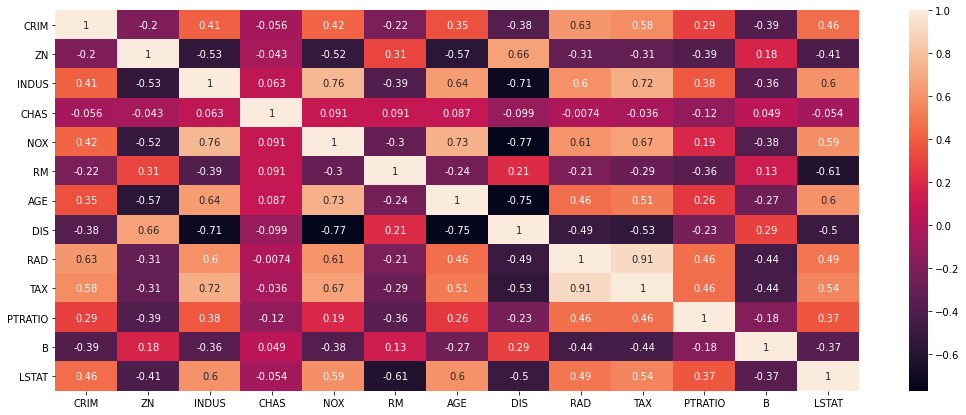

In [76]:
plt.figure(figsize=[18,7])
sns.heatmap(x.corr(),annot=True)

# Variance Infation Factor.

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif = [vif(Xc.values, i) for i in range(Xc.shape[1])]

pd.DataFrame(vif, index=Xc.columns, columns=['vif'])

,vif
const,585.265238
CRIM,1.792192
ZN,2.298758
INDUS,3.991596
CHAS,1.073995
NOX,4.393720
RM,1.933744
AGE,3.100826
DIS,3.955945
RAD,7.484496


# Assumption-2 Normality of Residuals.

In [78]:
Xc = Xc.drop(['AGE','INDUS'],axis=1)

In [79]:
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 27 May 2021   Prob (F-statistic):          5.54e-137
Time:                        21:55:24   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
residuals = model.resid
residuals

0      -6.124281
1      -3.396528
2       4.166630
3       4.752005
4       8.217359
         ...    
501    -1.137900
502    -1.780817
503    -3.709999
504    -4.111333
505   -10.440843
Length: 506, dtype: float64

<AxesSubplot:ylabel='Density'>

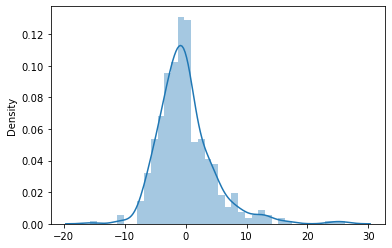

In [81]:
sns.distplot(residuals)

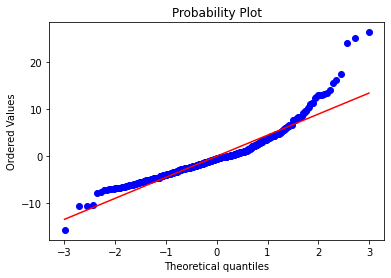

In [82]:
import scipy.stats as stats
stats.probplot(residuals, plot=plt)
plt.show()

In [83]:
print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=787.7851418746437, pvalue=0.0)


## Null and Alternative Hypothesis:
- Ho : Data is normal.
- H1 : Data is not normal.

### Note:- Since p-value(0.0) is less than 0.05, we will conclude that residual is not normal.

In [84]:
### To convert the residuals into normal so Transform into log.

logy = np.log(y)

model = sm.OLS(logy, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Thu, 27 May 2021   Prob (F-statistic):          4.31e-159
Time:                        21:55:25   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.000       3.685       4.483
CRIM          -0.0103      0.001     -7.856      0.000      -0.013      -0.008
ZN             0.0011      0.001      2.007      0.045    2.28e-05       0.002
CHAS           0.1051      0.034      3.072      0.002       0.038       0.172
NOX           -0.7217      0.142     -5.095      0.000      -1.000      -0.443
RM             0.0907      0.016      5.569      0.000       0.059       0.123
DIS           -0.0517      0.007     -6.948      0.000      -0.066      -0.037
RAD            0.0134      0.003      5.293      0.000       0.008       0.018
TAX           -0.0006      0.000     -4.129      0.000      -0.001      -0.000
PTRATIO       -0.0374      0.005     -7.237      0.000      -0.048      -0.027
B              0.0004      0.000      3.852      0.000       0.000       0.001
LSTAT         -0.0286      0.002    -15.053      0.000      -0.032      -0.025
==============================================================================
Omnibus:                       59.445   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.361
Skew:                           0.459   Prob(JB):                     4.26e-50
Kurtosis:                       6.153   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
residuals = model.resid
print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=227.3607352266431, pvalue=0.0)


In [86]:
## we can treat the outliers and also get the data into normal.

# Assumption-3, Test of Homoscedasticity (Constant Variance of residuals).

In [87]:
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 27 May 2021   Prob (F-statistic):          5.54e-137
Time:                        21:55:25   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

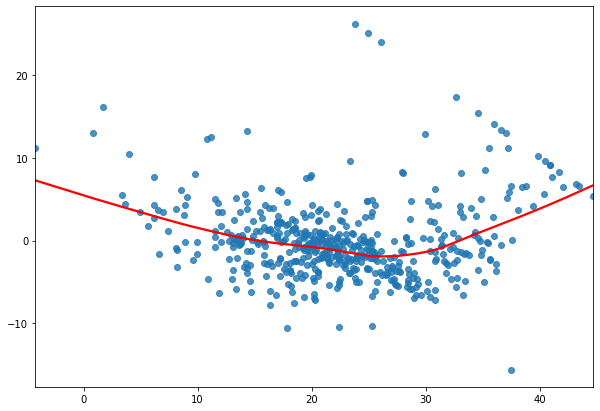

In [88]:
plt.figure(figsize=[10,7])
residuals = model.resid
y_pred = model.predict(Xc)

sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})

# locally weighted error sum of squares(lowess)
# lowess is not one best fit line, its collection of lines.

In [89]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(y=model.resid, x=Xc)

(2.2836707086343964, 1.3454126630538586e-10, 'increasing')

## The Null and Alternative Hypothesis.
- Ho : Variance of residuals is constant.
- H1 : Variance of residuals is not Constant.

## Conclusion:
- **Since p=1.3454126630538586e-10,(lower than 0.05).**
- **We will reject the Null hypotheis Ho.**
- **To Conclude that variance is not constant.**

In [90]:
### We can treat the outliers or transform the residuals(log,sqrt).

# Assumption-4 Autocorrelation Of residuals.

In [91]:
## Time Series data??????

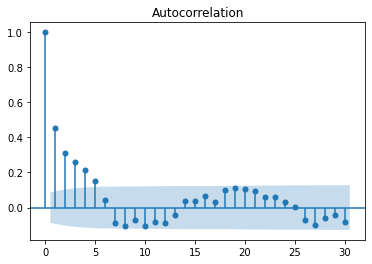

In [92]:
residuals = model.resid
import statsmodels.tsa.api as smt

smt.graphics.plot_acf(residuals, lags=30)
plt.show()

In [93]:
## bos = bos.sample(frac=1, random_state=4).reset_index(drop=True)
bos = bos.sort_values(by='price')

y = bos['price']
x = bos.drop(['price','AGE','INDUS'],axis=1)

Xc = sm.add_constant(x)

model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 27 May 2021   Prob (F-statistic):          5.54e-137
Time:                        21:55:27   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumption-5 Linearity of relationship.

#### Note:- This Assumption test for appropriateness of the model.(whether the model complexcity is adequate for capturing the overall pattern of the data). It is Not checking if the realtionship is linear or not.

<AxesSubplot:xlabel='price'>

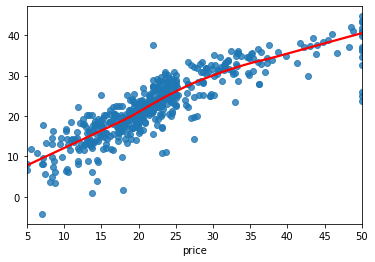

In [94]:
y_pred = model.predict(Xc)

sns.regplot(x=y, y=y_pred, lowess=True, line_kws={'color':'red'})

In [95]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model) 


### we can also give fraction : fraction is percentage of data.
### According to the percentage of the data we decide how many percentage of data follow linear relationship.
sm.stats.diagnostic.linear_rainbow(model, frac=0.5) 

(14.83454777667056, 2.733140873482499e-78)

## The Null and Alternative Hypothesis.
- Ho : fit of model using full sample = fit of the model using a central subset(linear relationship)
    
- H1 : fit of model using full sample is worse compared to fit of model using a central subset.

### Conclusion:
- Since p=2.29513488240353e-78(lower than 0.05).
- We reject the null hypotheis Ho.
- to conclude that the model is not appropriate.
- Not adequate, we need to rework on the model.
